# Checking for correlations, flights dataframe

In [1]:
import pandas as pd
import numpy as np

In [9]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')

# remove special delay columns that are included for potential future stretch work
to_drop = ['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay','security_delay','late_aircraft_delay','total_add_gtime','longest_add_gtime']
fl_df = fl_df.drop(labels=to_drop, axis=1)

In [10]:
fl_df.shape

(600000, 33)

In [11]:
# check info on delays
fl_df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,600000.000000,600000.000000
mean,10.502537,5.585641
std,47.300555,50.124606
min,-272.000000,-260.000000
25%,-6.000000,-15.000000
50%,-2.000000,-6.000000
75%,8.000000,7.000000
max,1912.000000,2649.000000


In [12]:
corrmat = fl_df.corr()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

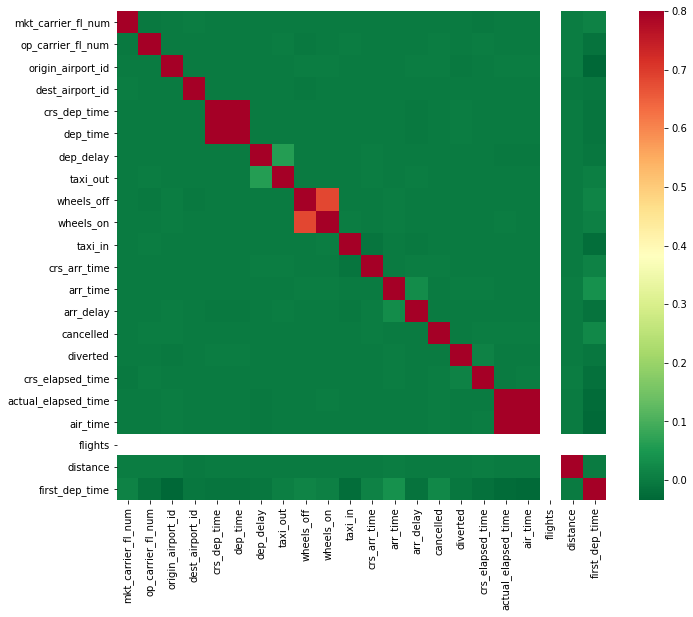

In [14]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

## With encoding

In [17]:
# encode categorical vars
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = fl_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    fl_df[col] = label_encoder.fit_transform(fl_df[col])


<AxesSubplot:>

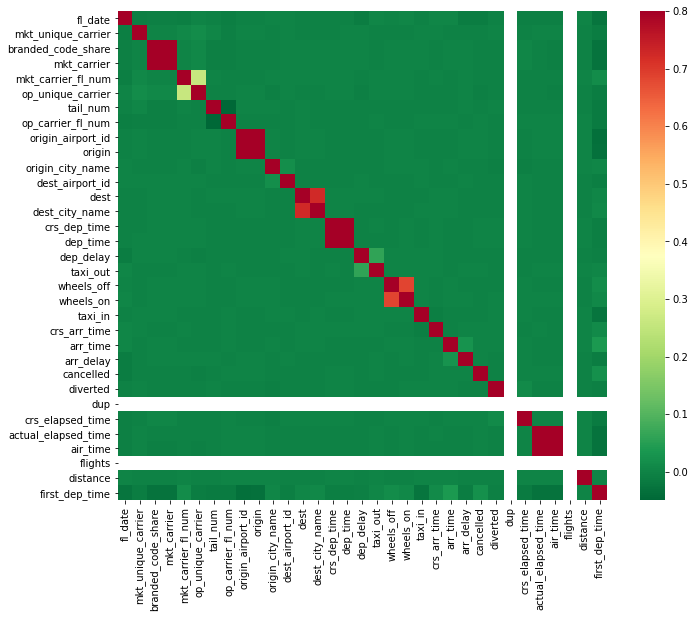

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = fl_df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

## Correlations after engineering features

In [20]:
feat_df = pd.read_csv(path+'balanced_more_flight_feats.csv')

In [21]:
feat_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'day', 'month', 'year', 'weekday', 'day_of_year',
       'timestamp', 'crs_arr_hour', 'crs_dep_hour', 'crs_arr_daytime',
       'crs_dep_daytime', 'season', 'dep_early_morning', 'origin_fl_density',
       'dest_fl_density', 'predicted_speed', 'dist_group',
       'origin_airport_size', 'dest_airport_size', 'origin_num_passengers',
       'dest_num_passengers', 'origin_num_freight', 'dest_num_freight',
       'mean_op_carrier_delay', 'mean_delay_origin_airport',


In [22]:
# encode categorical vars
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = feat_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    feat_df[col] = label_encoder.fit_transform(feat_df[col])

<AxesSubplot:>

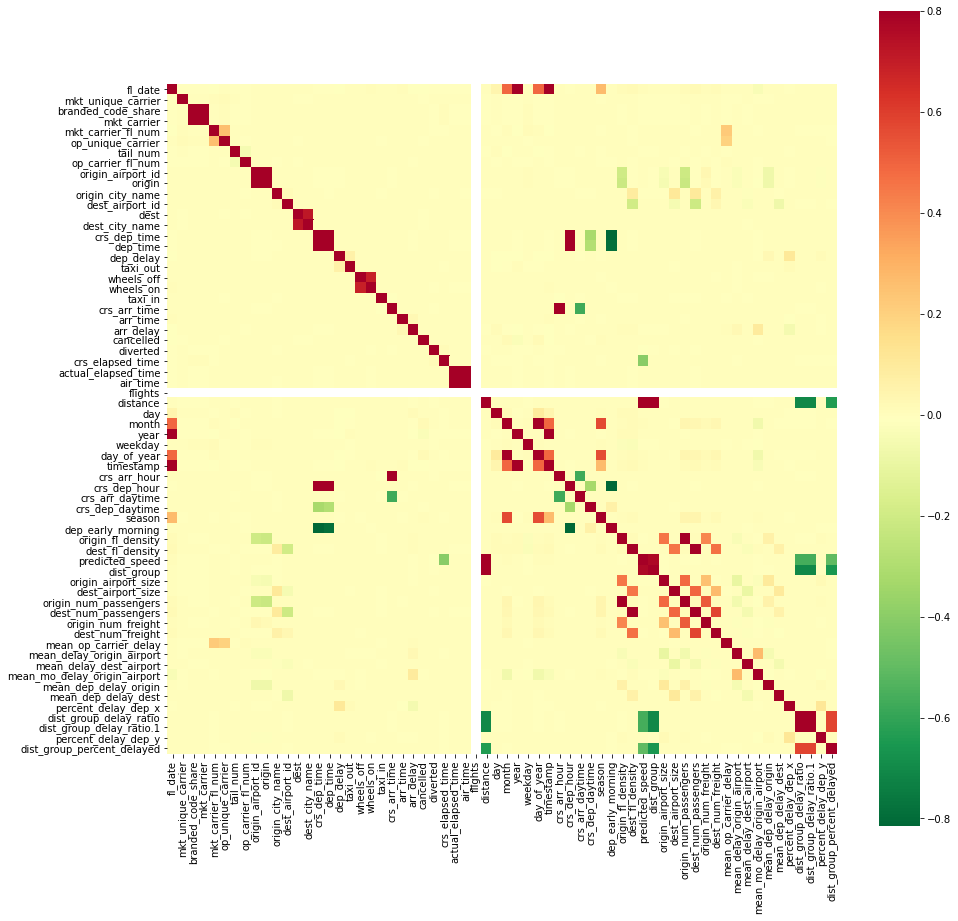

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = feat_df.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

In [ ]:
# correlations to note, although not necessarily unexpected
"""
- several between carries and flight nums
- several between airport_id's and origin/dest names
- fl_date and the new time features
- departure/arr times and dep/arr hour  and morning/not morning
- distance and dist group
- airport size and freight/passenger metrics
"""
# will likely choose just just one of each correlated pair
# speaking with a mentor they recommended not worrying too much about correlations
# aka if it helps model, keep, even if correlated